# Unit 4 Final Projects: Calculating evolutionary distance

In this notebook you will compare the sequence of a particular gene from 3 different species to find out which two are most closely related. 

You will need to do the following:
1. Open and read in your files
2. Decide which sequences to compare (DNA, RNA, or protein)
    3. Write a function that returns the percent similarity of each pair of sequences
4. Call the function on each pair of sequences to find out which are most similar

In [58]:
walDNA = open("3_walrus_HBB_DNA.txt").read()
whaleDNA = open("3_sperm_whale_HBB_DNA.txt").read()
dogDNA = open("3_dog_HBB_DNA.txt").read()

In [2]:
def transcribe(DNAseq):
    RNA = ""
    for base in DNAseq:
        if base == "C":
            RNA += "G"
        elif base == "G":
            RNA += "C"
        elif base == "A":
            RNA += "U"
        elif base == "T":
            RNA += "A"
        else:
            continue
    return RNA

def translate(RNA):
    codonDict = {"UUU":"F","UUC":"F","UUA":"L","UUG":"L", "CUU":"L","CUC":"L", 
             "CUA":"L","CUG":"L","AUU":"I","AUC":"I","AUA":"I","AUG":"M",
             "GUU":"V","GUC":"V","GUA":"V","GUG":"V","UCU":"S","UCC":"S",
             "UCA":"S","UCG":"S","CCU":"P","CCC":"P","CCA":"P","CCG":"P",
             "ACU":"T","ACC":"T","ACA":"T","ACG":"T","GCU":"A","GCC":"A",
             "GCA":"A","GCG":"A","UAU":"Y","UAC":"Y","UAA":"STOP","UAG":"STOP",
             "UGA":"STOP","CAU":"H","CAC":"H","CAA":"Q","CAG":"Q","AAU":"N",
             "AAC":"N","AAA":"K","AAG":"K","GAU":"D","GAC":"D","GAA":"E",
             "GAG":"E","UGU":"C","UGC":"C","UGG":"W","CGU":"R","CGC":"R",
             "CGA":"R","CGG":"R","AGU":"S","AGC":"S","AGA":"R","AGG":"R",
             "GGU":"G","GGC":"G","GGA":"G","GGG":"G"}
    protein = ""
    codon = ""
    for i in RNA:
        if len(codon) == 3:
            protein += codonDict[codon]
            codon = ""
            codon += i
        else:
            codon += i
    return protein


In [11]:
def compare(pro1,pro2):
    num_diff = 0
    for c,i in enumerate(pro1):
        if pro2[c] != i:
            num_diff += 1
    return num_diff

In [12]:
walPRO = translate(transcribe(walDNA))
whalePRO = translate(transcribe(whaleDNA))
dogPRO = translate(transcribe(dogDNA))

In [14]:
print(compare(whaleDNA, walDNA))
print(compare(whaleDNA, dogDNA))
print(compare(dogDNA, walDNA))

59
61
22


In [6]:
print(len(whaleDNA))
print(len(walDNA))
print(len(dogDNA))

435
435
435


In [43]:
def persim(pro1,pro2):
    num_sim = 0
    for c,i in enumerate(pro1):
        if pro2[c] == i:
            num_sim += 1
        percent_sim = ((num_sim/len(pro1)) * 100)
    return percent_sim 
whw = persim(whaleDNA, walDNA)
whd = persim(whaleDNA, dogDNA)
wd = persim(dogDNA, walDNA)
print(whw)
print(whd)
print(wd)

86.4367816091954
85.97701149425288
94.94252873563218


## Bonus Challenge

Visualize your results! Choose a graph type that you think will communicate your conclusions effectively and create it using matplotlib:

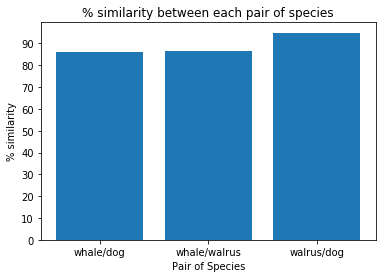

In [60]:
import matplotlib.pyplot as plt
plt.bar([1,2,3], [whd,whw,wd])
plt.xticks([1,2,3],["whale/dog", "whale/walrus", "walrus/dog"])
plt.yticks(range(0,100,10))
plt.ylabel("% similarity")
plt.xlabel("Pair of Species")
plt.title("% similarity between each pair of species")
plt.show()

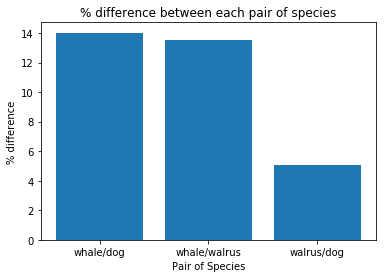

In [61]:
import matplotlib.pyplot as plt
plt.bar([1,2,3], [100 - whd,100 - whw,100 - wd])
plt.xticks([1,2,3],["whale/dog", "whale/walrus", "walrus/dog"])
plt.ylabel("% difference")
plt.xlabel("Pair of Species")
plt.title("% difference between each pair of species")
plt.show()

## Bonus Challenge 2
If you finish your project and want to try a challenge, come up with a hypothesis about which of the following species are most closely related to humans (carp, chicken, chimp, dog, eel, elephant, frog, gorilla, macaque monkey, mouse, orangutan, pig). Write out a ranked list with the species you think is most related to humans at the top.

Then calculate the percent difference between the hemoglobin amino acid sequences of humans and each species to find out how close you came to the right ranking!